### Example problems for running total least squares B-spline curve fitting algorithms
See header of curve fitting main function in file curveFittingFunctions.py for more detailed description. 

Inputs:
 - data        - the data to be fitted
 - ncp         - numer of control points in B-spline curve
 - p           - degree of B-spline curve
 - refine      - boolean flag (True or False) to add points to refine the data
 
Outputs:
 - t     - nodes/parameterization of data set
 - knots - B-spline knot vector
 - CP    - control points B-Spline Curve
 
#### Problem#1: Dillner airfoil
This is a simple problem, degree p=3 with 23 control points for 35 data points. Boolean refinement feature is off.
#### Problem#2: Portion of coastline
This is a more complicated problem, degree p=3 with 446 control points. Note there are 223 data points for this case and (number of control points) > (number of data points) because the refinement feature is on.

##### Created by: DeAnna Sewell Gilchrist

In [1]:
# set up environment
##--------------------------------------------------------------------------
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
# import curve fitting functions
##--------------------------------------------------------------------------
from curveFittingFunctions import bspline_curve_fit
from curveFittingFunctions import splvander
from curveFittingFunctions import to_min
from curveFittingFunctions import computeKnots

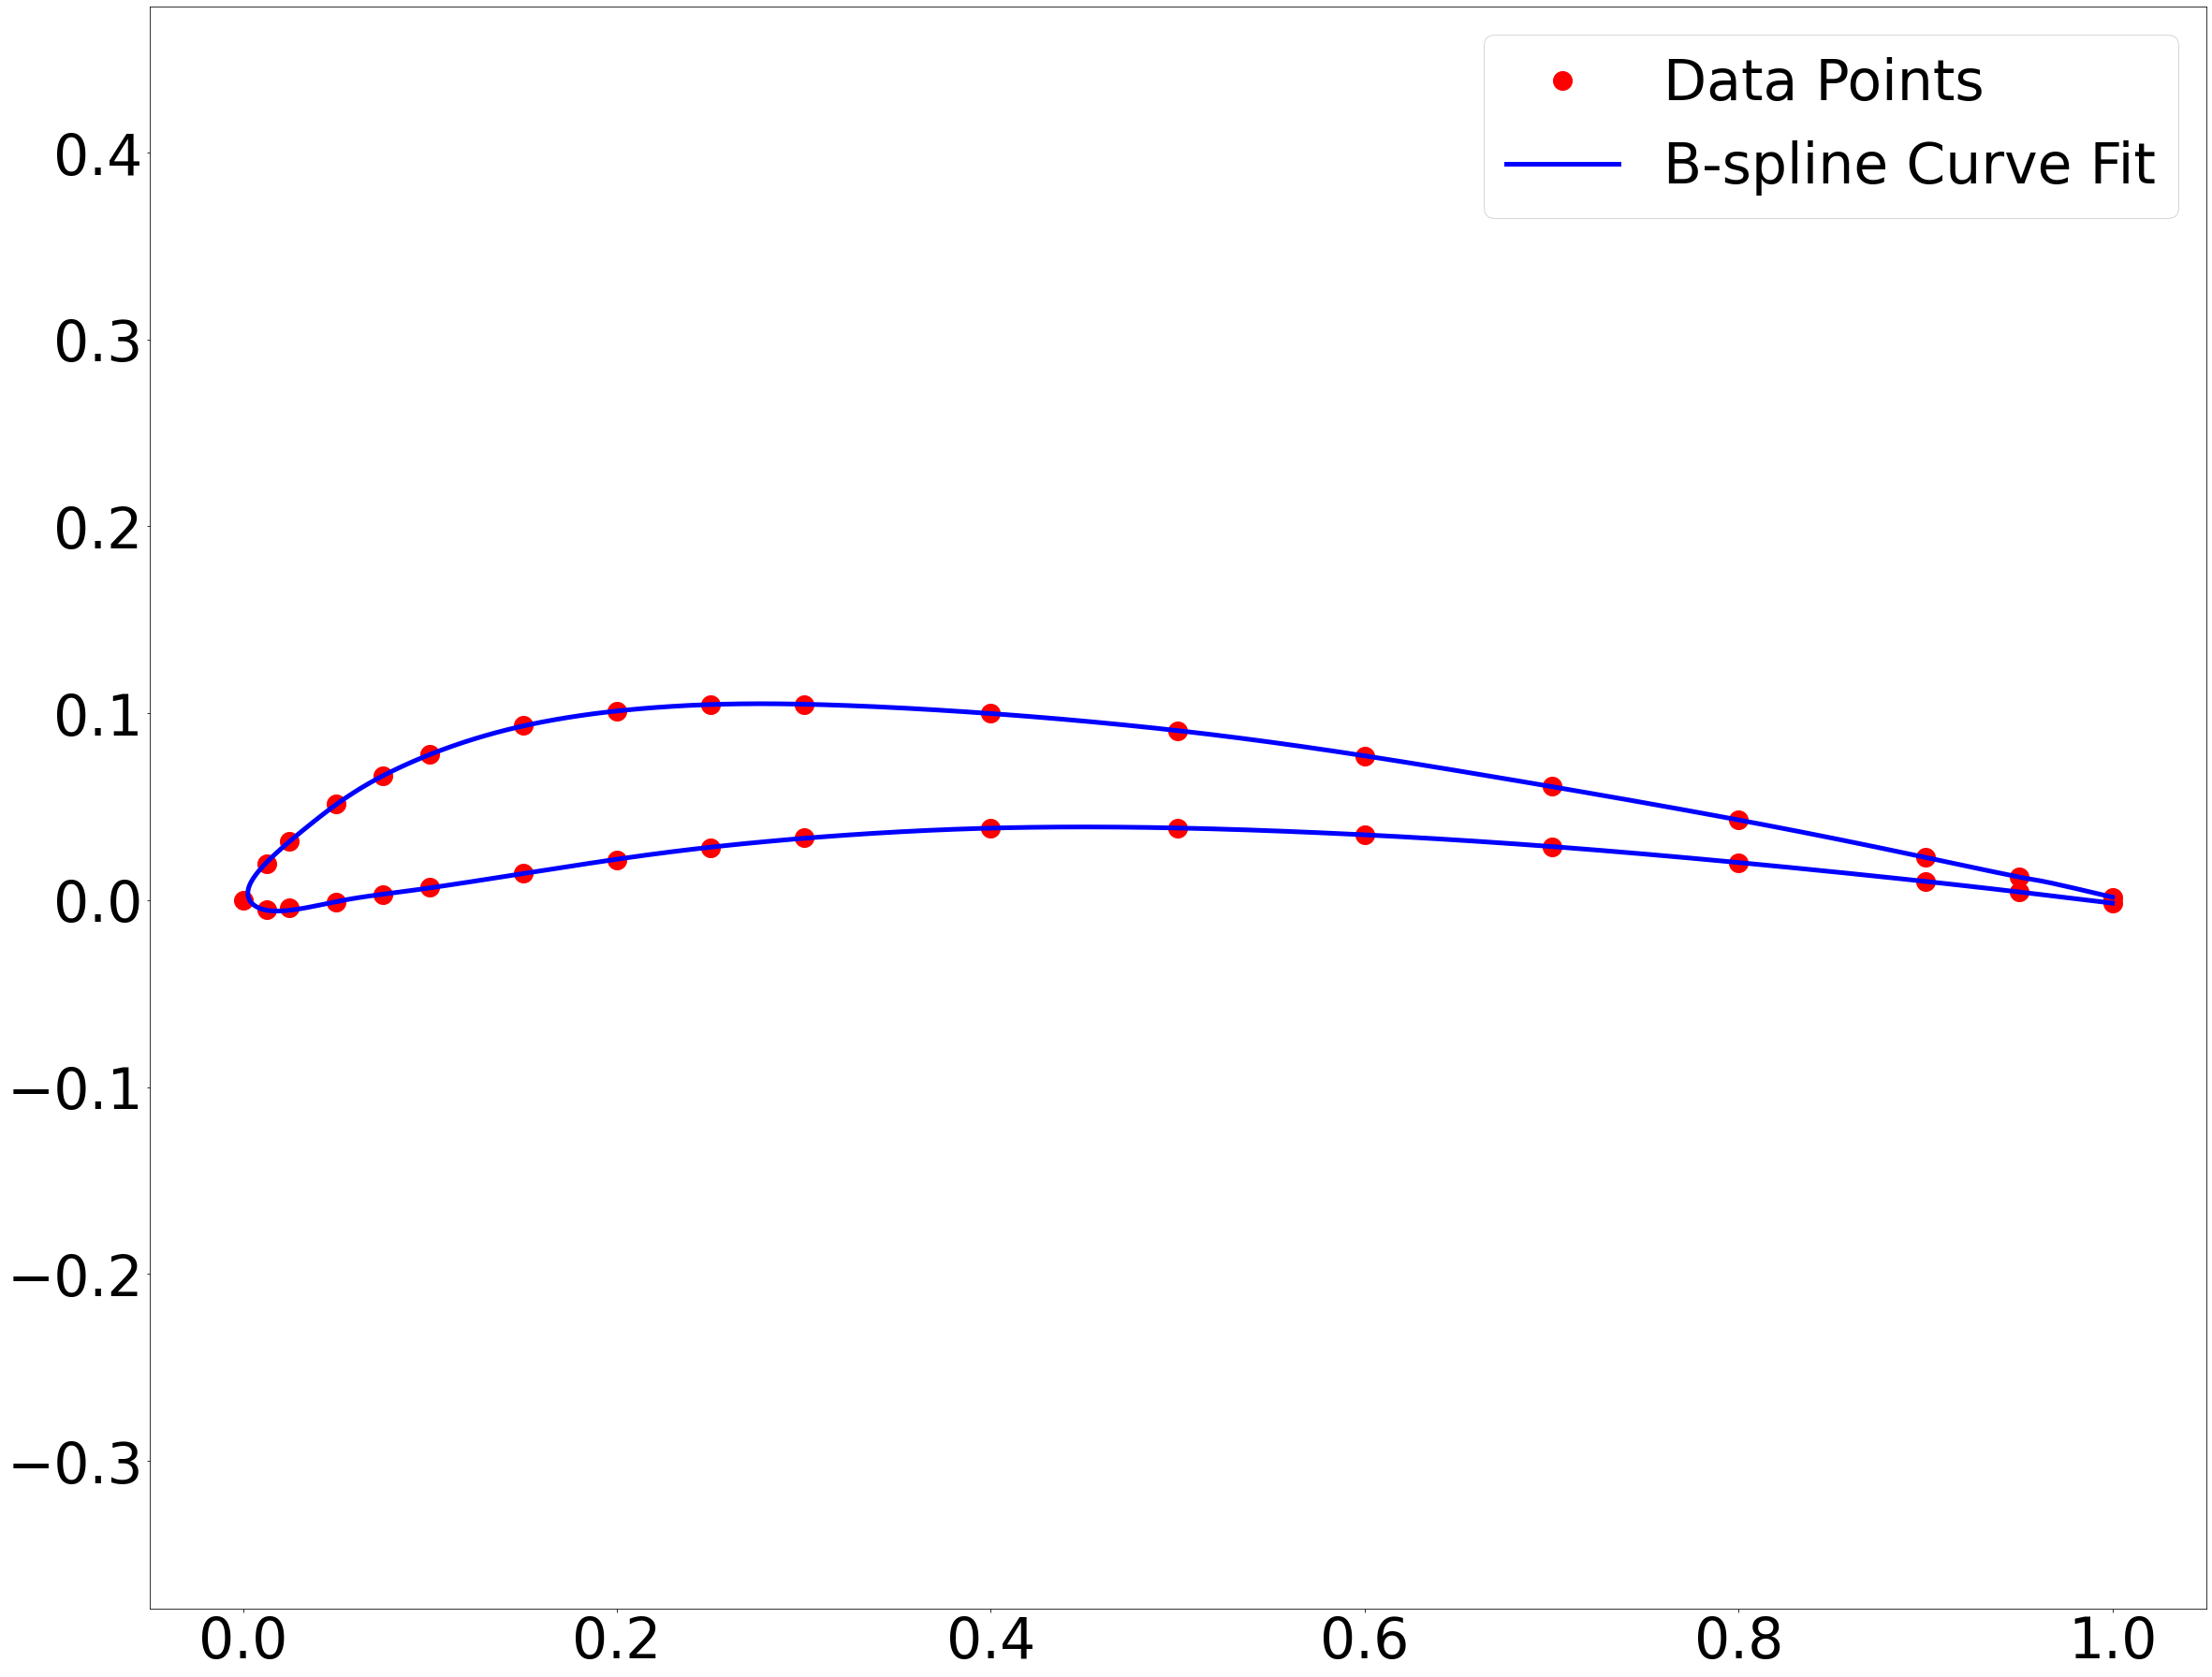

In [3]:
# Dillner airfoil
##--------------------------------------------------------------------------

dillner = pd.read_excel('examples.xlsx', header=0,sheet_name = 'Dillner').to_numpy()
ncp = 23
p=3
# main function, inputs and outputs described above
t,kts,cp=bspline_curve_fit(dillner, ncp, p, False)



##--------------------------------------------------------------------------
## Plotting
##--------------------------------------------------------------------------

# Generate plotting points, tt, and B-spline matrix from resulting control points, cp
tt = np.linspace(0,1,num=10000).T
BB = splvander(tt, 3, kts,0)    #B-spline matrix
BBplt = np.matmul(BB,cp)

rawData = dillner
plt.plot(rawData[:,0], rawData[:,1],'ro',markersize=20,label='Data Points')
plt.plot(BBplt[:,0], BBplt[:,1],'b', linewidth = 5,label='B-spline Curve Fit')
# plt.plot(cp[:,0], cp[:,1], 'k', marker='x',markersize=20) # show control points, optional
plt.legend(fontsize=60)
plt.axis('equal')
plt.rcParams['figure.figsize'] = [100/2.54, 80/2.54]
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.show()

In [4]:
# portion of NE US coastline
# note: this is slow, lots of points
##--------------------------------------------------------------------------

cape = pd.read_excel('examples.xlsx', header=0, sheet_name='cape').to_numpy()
ncp = 446  # > number of data points because boolean refinement feature is on
p=3

# main function, inputs and outputs described above
t,kts,cp=bspline_curve_fit(cape, ncp, p, True)

/Users/DeAnna/Documents/DeAnnaResearch/APPM_CE/curveFittingFunctions.py:129: RuntimeWarning: divide by zero encountered in true_divide
  ords = np.divide( (np.append(delT, 0) - np.append(0, delT) ), (np.append(t,1) - np.append(0,t) ) )
/Users/DeAnna/Documents/DeAnnaResearch/APPM_CE/curveFittingFunctions.py:129: RuntimeWarning: invalid value encountered in true_divide
  ords = np.divide( (np.append(delT, 0) - np.append(0, delT) ), (np.append(t,1) - np.append(0,t) ) )


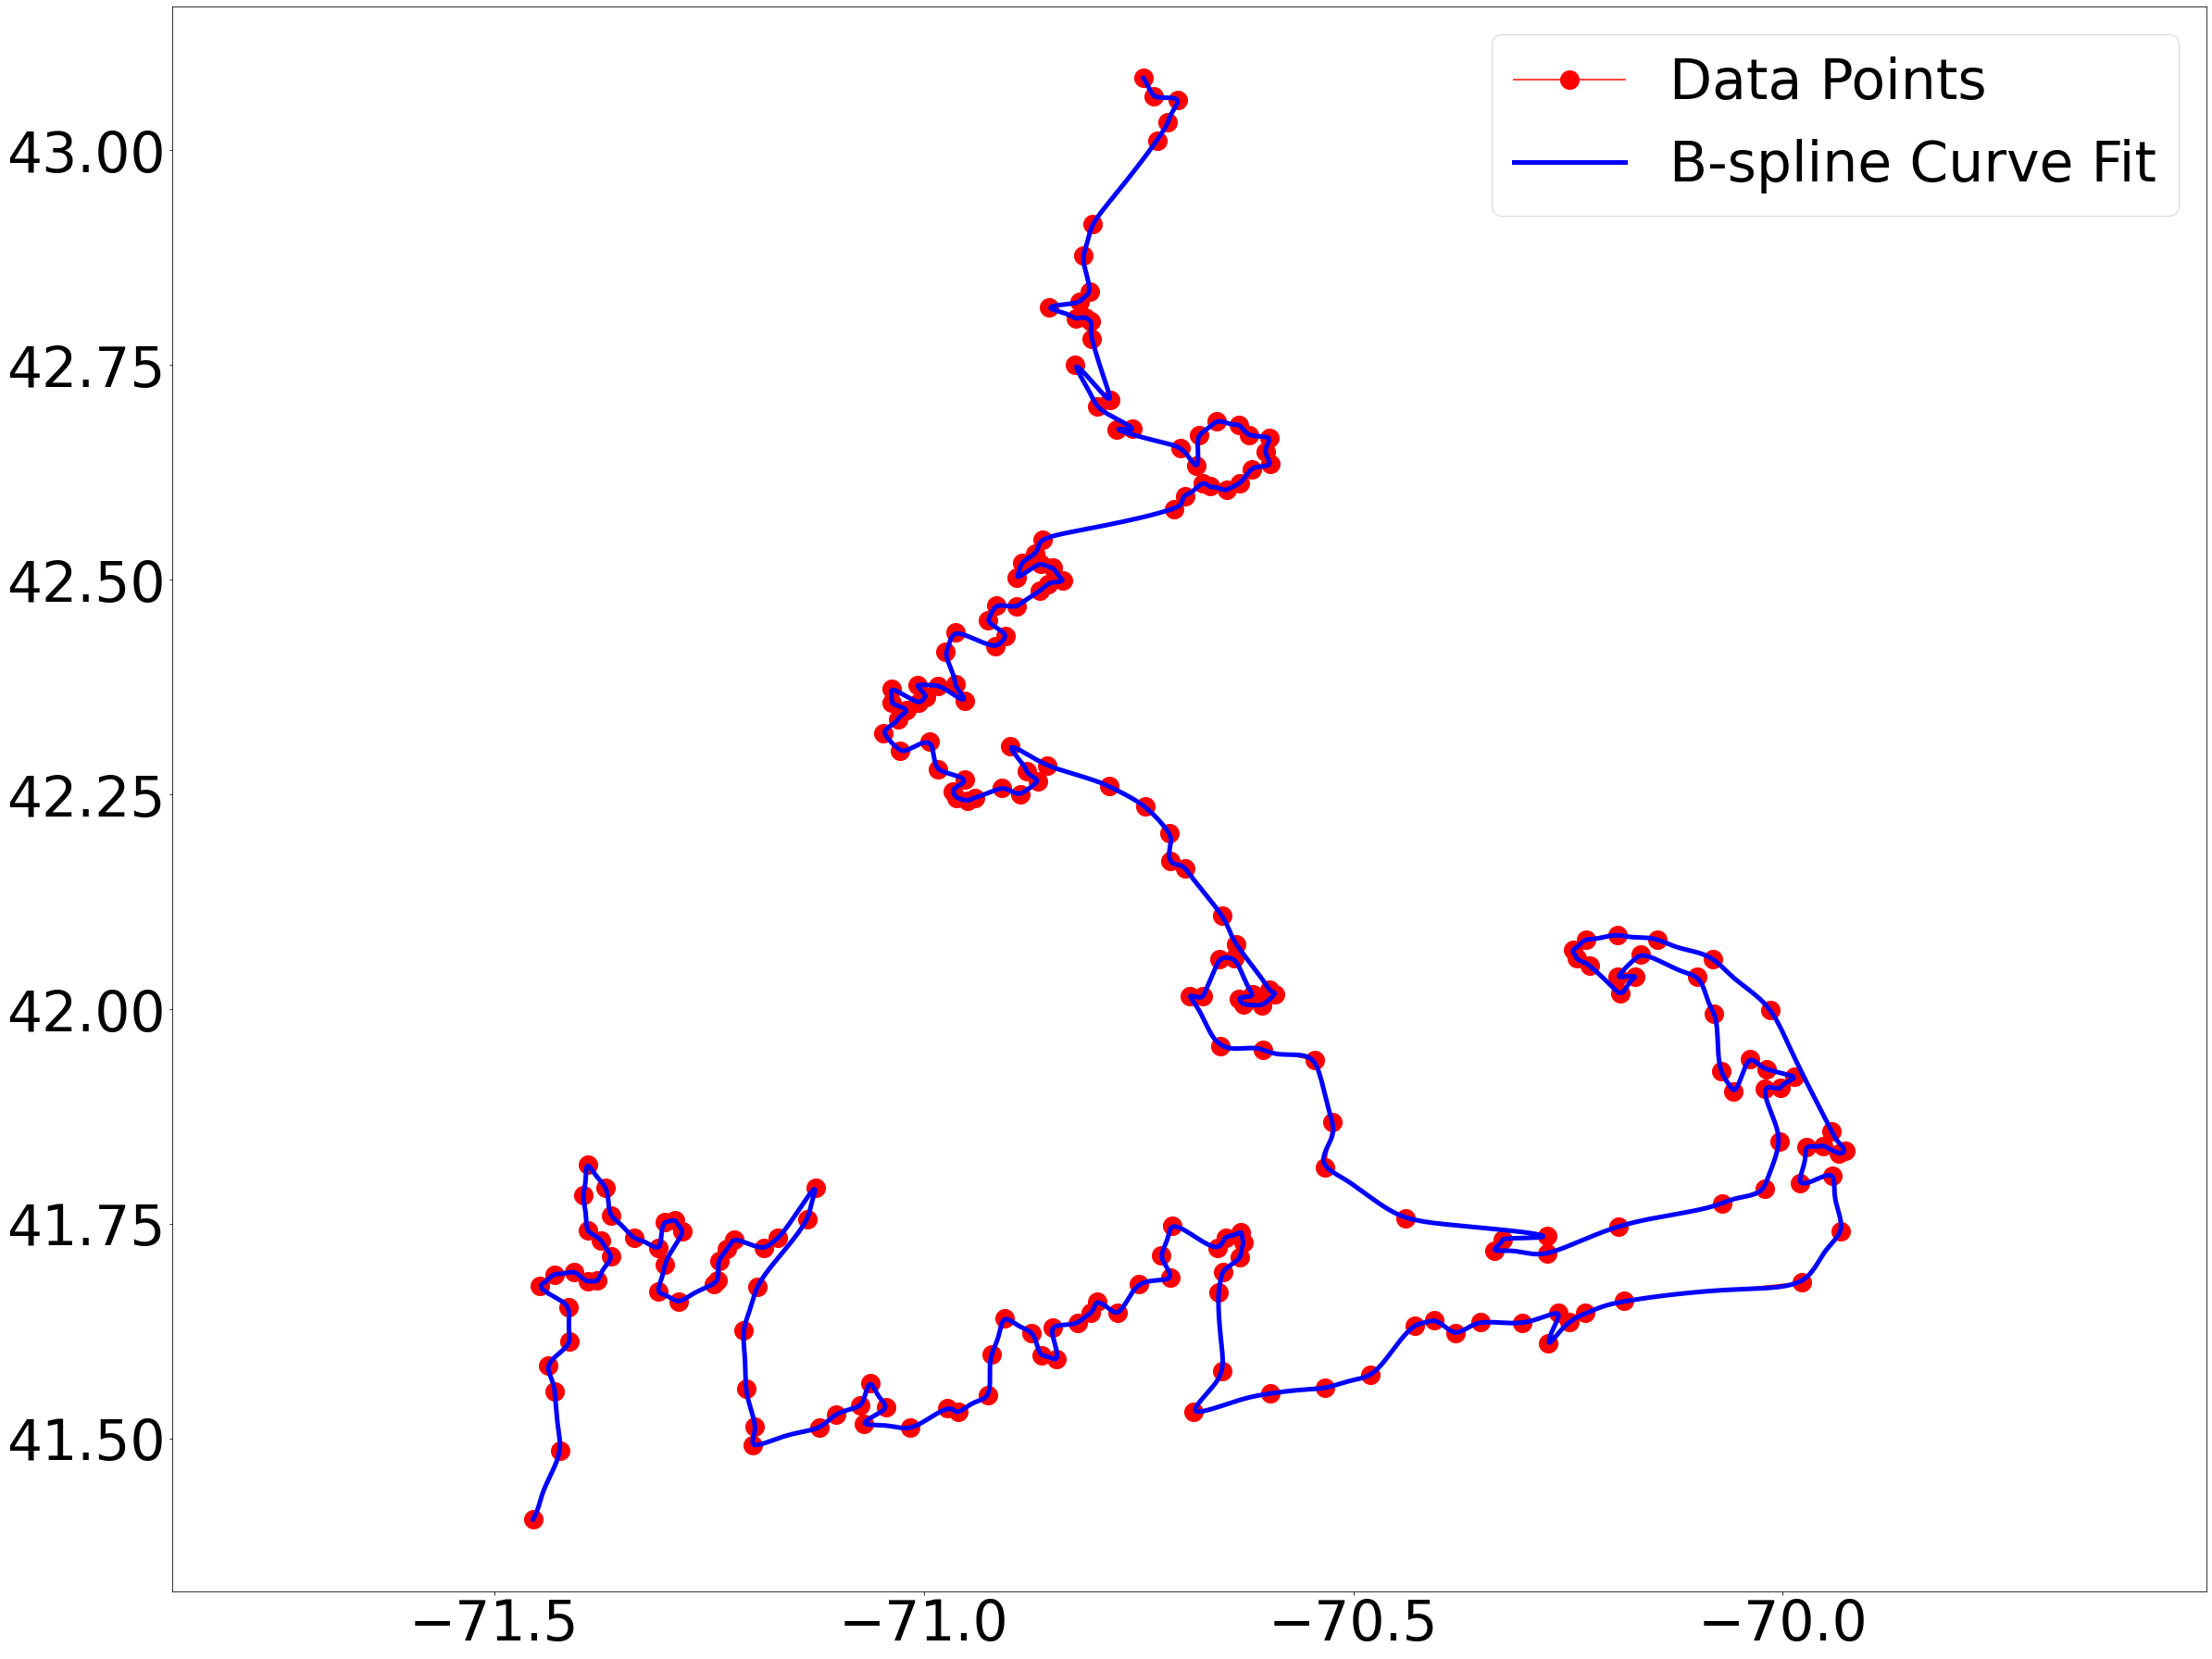

In [5]:
##--------------------------------------------------------------------------
## Plotting
##--------------------------------------------------------------------------

# Generate plotting points, tt, and B-spline matrix from resulting control points, cp
tt = np.linspace(0,1,num=10000).T
BB = splvander(tt, 3, kts,0)#B-spline matrix
BBplt = np.matmul(BB,cp)

rawData = cape
plt.plot(rawData[:,0], rawData[:,1],'r',marker='o',markersize=20, label='Data Points')
plt.plot(BBplt[:,0], BBplt[:,1],'b', linewidth = 5, label='B-spline Curve Fit')
# plt.plot(cp[:,0], cp[:,1], 'k',markersize=20)
plt.legend(fontsize=60)
plt.axis('equal')
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.rcParams['figure.figsize'] = [100/2.54, 80/2.54]
plt.show()